# Diabetes_dataset: classification 

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("D:\project\Diabetes_cv\diabetes1.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.drop(["SkinThickness"],inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [8]:
df.shape

(768, 8)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

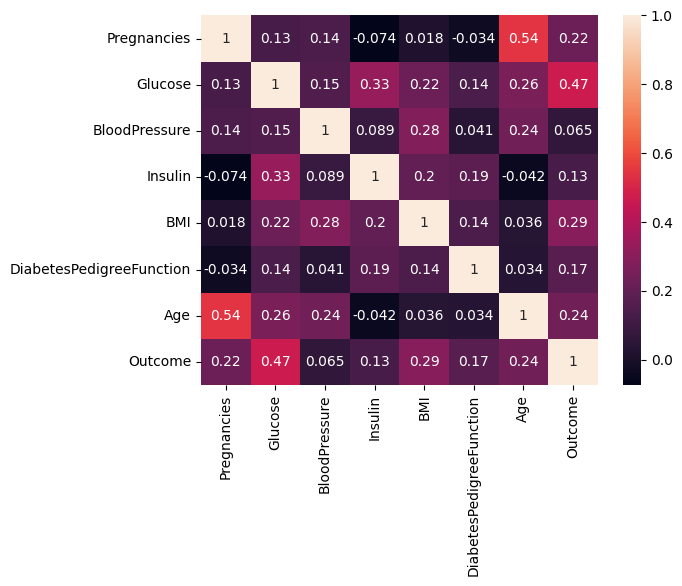

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
X = df.drop(["Outcome"],axis=1)
X.shape

(768, 7)

In [12]:
y = df.Outcome

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)
X.shape

(768, 7)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
X_train.shape

(614, 7)

In [16]:
X_test.shape

(154, 7)

In [17]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train ,y_train)
model.score(X_test,y_test)

0.6428571428571429

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train ,y_train)
model.score(X_test,y_test)

0.7662337662337663

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train ,y_train)
model.score(X_test,y_test)

0.7727272727272727

In [23]:
y_pred = model.predict(X_test)

<Axes: >

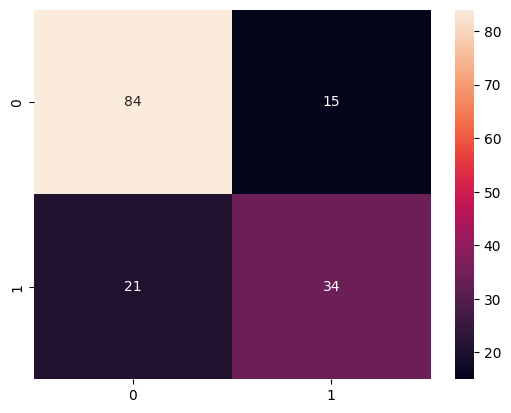

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [25]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

# Logistic accuracy is greater than Naive_bayes accuracy

In [27]:
model.predict([[6,148,72,0,33.6,0.627,50]])

array([1], dtype=int64)